<a href="https://colab.research.google.com/github/jcdumlao14/Projects/blob/main/englandweather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"Predicting Weather Conditions in England"**

# **Introduction**

This dataset contains hourly weather information in England from January 2006 to December 2016. The dataset includes the following features:

* Formatted Date: Date and time of the observation in UTC.
* Summary: A brief description of the weather condition for that hour.
* Precip Type: Type of precipitation that occurred, either rain or snow.
* Temperature (C): Temperature in Celsius.
* Wind Speed (km/h): Wind speed in kilometers per hour.
* Pressure (millibars): Atmospheric pressure in millibars.
* Humidity: Relative humidity as a value from 0 to 1.

This dataset can be used to explore weather patterns and relationships between different weather variables. It can also be used to develop machine learning models to predict future weather conditions based on past observations.

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

plt.rcParams['figure.figsize'] = (10,5)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")


# **Load the Data**

In [ ]:
# Load the data
weather_df = pd.read_csv('/content/EnglandWeather.csv')
weather_df.head().style.set_properties(**{'background-color':'lightgreen','color':'black','border-color':'#8b8c8c'})

,Formatted Date,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,2006-01-01 00:00:00.000 +0100,Partly Cloudy,rain,0.577778,17.114300,1016.660000,0.890000
1,2006-01-01 01:00:00.000 +0100,Mostly Cloudy,rain,1.161111,16.615200,1016.150000,0.850000
2,2006-01-01 02:00:00.000 +0100,Mostly Cloudy,rain,1.666667,20.253800,1015.870000,0.820000
3,2006-01-01 03:00:00.000 +0100,Overcast,rain,1.711111,14.490000,1015.560000,0.820000
4,2006-01-01 04:00:00.000 +0100,Mostly Cloudy,rain,1.183333,13.942600,1014.980000,0.860000


# **Exploratory Data Analysis (EDA)**

In [ ]:
weather_df.shape


(96453, 7)

In [ ]:
weather_df['Formatted Date'] = weather_df['Formatted Date'].str.split('',expand = True)[0]

In [ ]:
# Check the data types of each column
weather_df.dtypes


Formatted Date           object
Summary                  object
Precip Type              object
Temperature (C)         float64
Wind Speed (km/h)       float64
Pressure (millibars)    float64
Humidity                float64
dtype: object

In [ ]:
weather_df.dropna()

,Formatted Date,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,,Partly Cloudy,rain,0.577778,17.1143,1016.66,0.89
1,,Mostly Cloudy,rain,1.161111,16.6152,1016.15,0.85
2,,Mostly Cloudy,rain,1.666667,20.2538,1015.87,0.82
3,,Overcast,rain,1.711111,14.4900,1015.56,0.82
4,,Mostly Cloudy,rain,1.183333,13.9426,1014.98,0.86
...,...,...,...,...,...,...,...
96448,,Mostly Cloudy,rain,0.488889,9.7566,1020.03,0.86
96449,,Mostly Cloudy,rain,0.072222,9.4185,1020.27,0.88
96450,,Mostly Cloudy,snow,-0.233333,9.2736,1020.50,0.89
96451,,Mostly Cloudy,snow,-0.472222,9.2414,1020.65,0.91


In [ ]:
weather_df.isnull().sum()


Formatted Date            0
Summary                   0
Precip Type             517
Temperature (C)           0
Wind Speed (km/h)         0
Pressure (millibars)      0
Humidity                  0
dtype: int64

The Precip Type column has 517 missing values. Since the missing values are only in this column, we can still work with the rest of the dataset.

Let's check the summary statistics of the numerical variables in the dataset:



In [ ]:
weather_df.describe()


,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
count,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.810640,1003.235956,0.734899
std,9.551546,6.913571,116.969906,0.195473
min,-21.822222,0.000000,0.000000,0.000000
25%,4.688889,5.828200,1011.900000,0.600000
50%,12.000000,9.965900,1016.450000,0.780000
75%,18.838889,14.135800,1021.090000,0.890000
max,39.905556,63.852600,1046.380000,1.000000


We can see that the dataset contains 96453 rows and 7 columns. The Temperature (C), Wind Speed (km/h), Pressure (millibars), and Humidity columns are numerical, while the Formatted Date, Summary, and Precip Type columns are categorical.



# **Distribution of the Numerical Variables**

Now, let's look at the distribution of the numerical variables in the dataset using histograms.

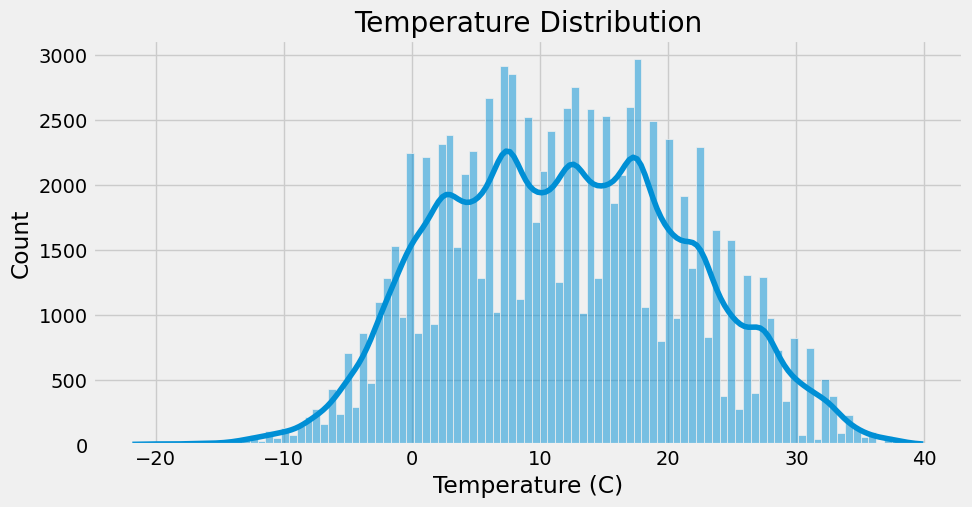

In [ ]:
sns.histplot(data=weather_df, x='Temperature (C)', kde=True)
plt.title('Temperature Distribution')
plt.show()

We get a histogram and a kernel density estimate plot of the distribution of temperature in the dataset.

We can see that the temperature is mostly distributed between 5 and 20 degrees Celsius.



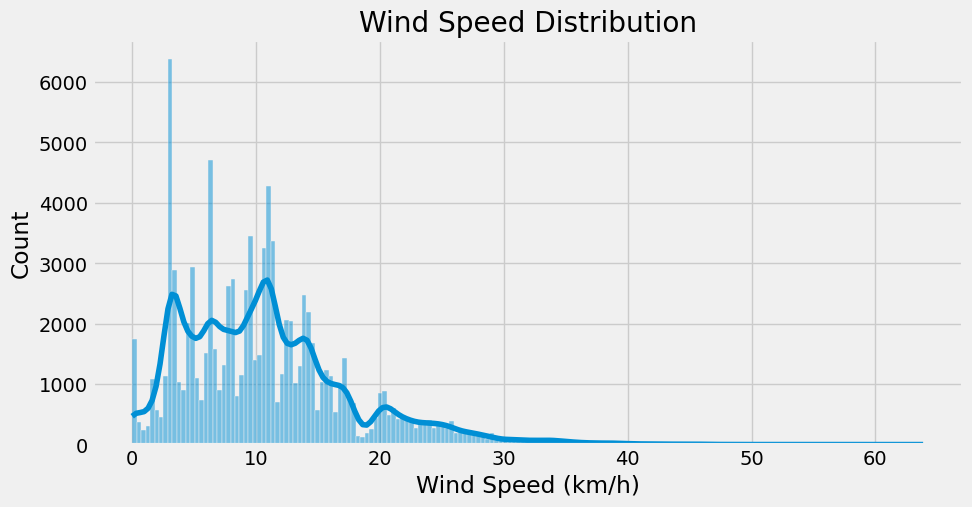

In [ ]:
sns.histplot(data=weather_df, x='Wind Speed (km/h)', kde=True)
plt.title('Wind Speed Distribution')
plt.show()


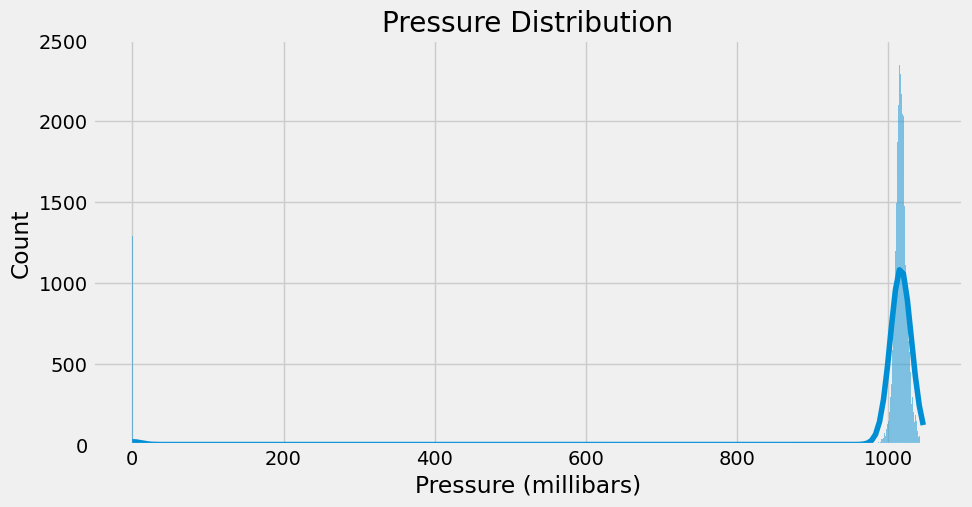

In [ ]:
sns.histplot(data=weather_df, x='Pressure (millibars)', kde=True)
plt.title('Pressure Distribution')
plt.show()

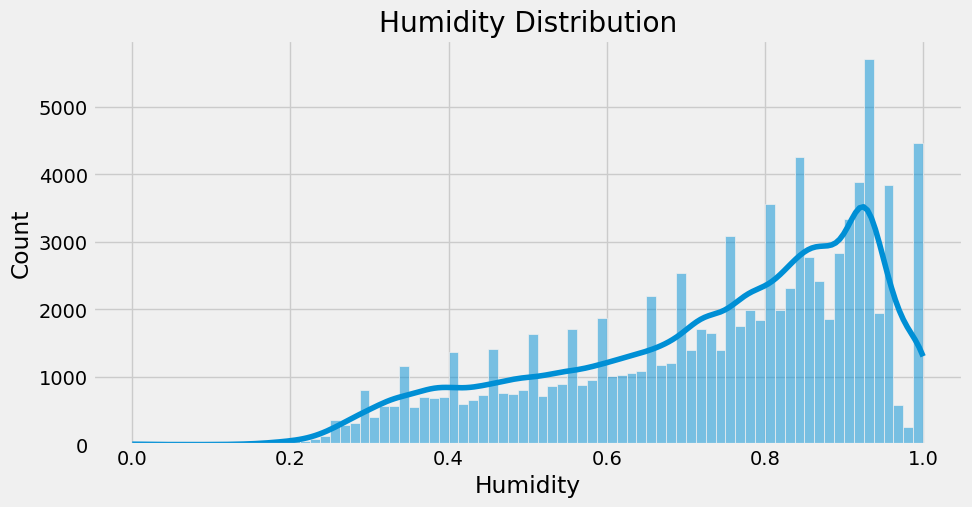

In [ ]:
sns.histplot(data=weather_df, x='Humidity', kde=True)
plt.title('Humidity Distribution')
plt.show()


# **Relationship between Temperature and Humidity**

Now, let's create a scatter plot to see the relationship between Temperature (C) and Humidity.


<Axes: xlabel='Temperature (C)', ylabel='Humidity'>

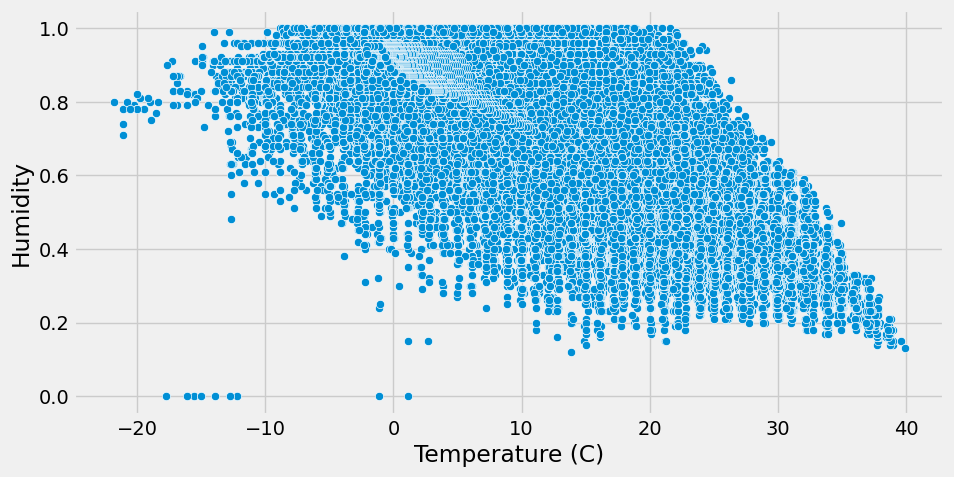

In [ ]:
sns.scatterplot(x='Temperature (C)', y='Humidity', data=weather_df)


We get a scatter plot of the relationship between temperature and humidity in the dataset.

# **Summary Distribution**

Text(0, 0.5, 'Count')

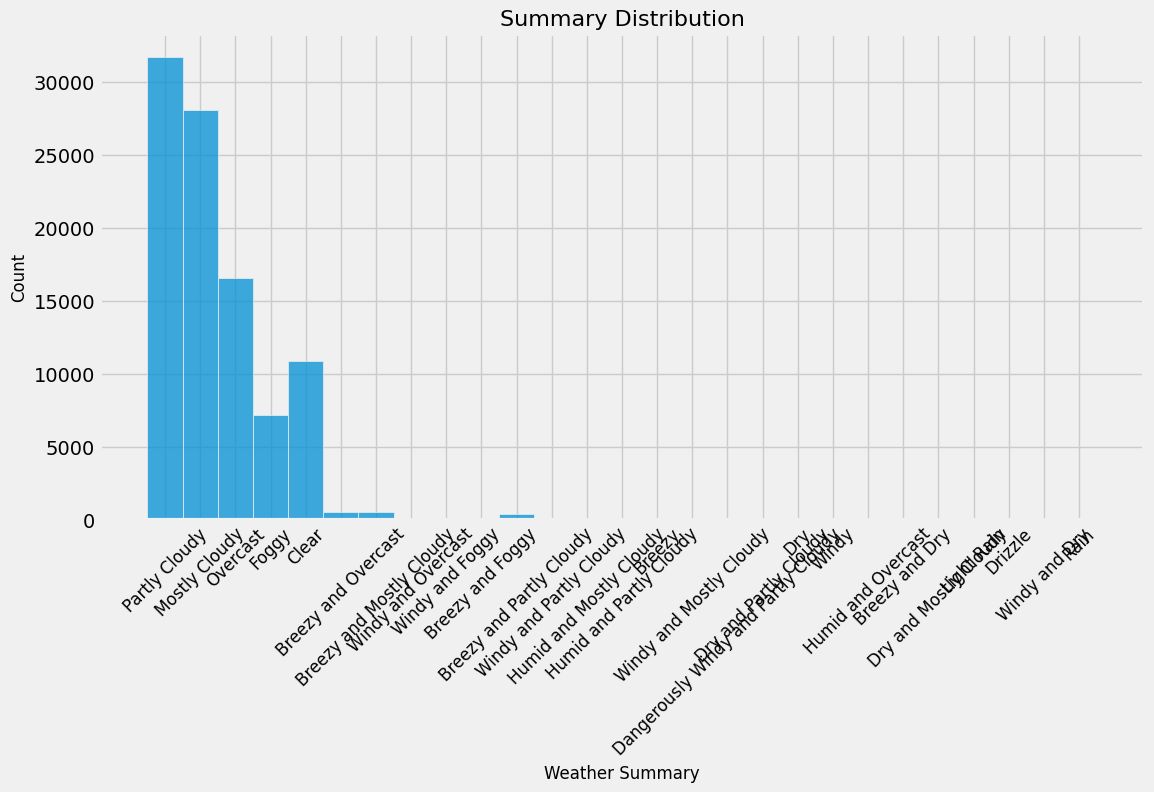

In [ ]:
# Visualize the distribution of the categorical variables using histograms
plt.figure(figsize=(12,6))
sns.histplot(data=weather_df, x="Summary", bins=20)
plt.xticks(rotation=45, fontsize=12)
plt.title('Summary Distribution', fontsize=16)
plt.xlabel('Weather Summary', fontsize=12)
plt.ylabel('Count', fontsize=12)


Text(0, 0.5, 'Count')

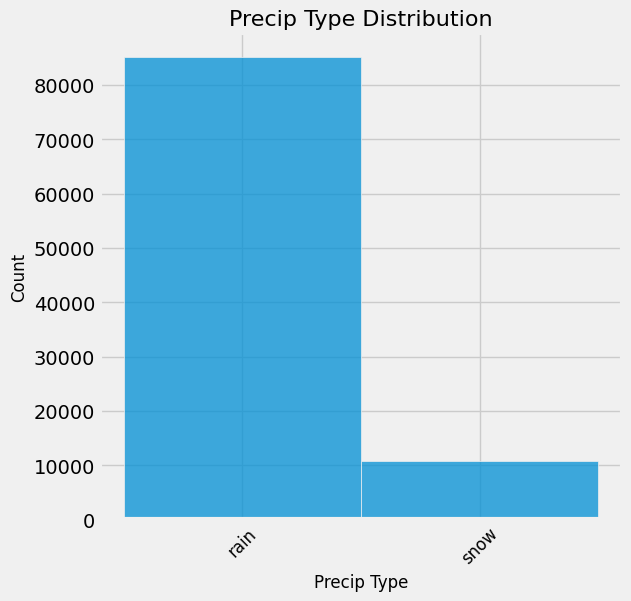

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(data=weather_df, x="Precip Type", bins=20)
plt.xticks(rotation=45, fontsize=12)
plt.title('Precip Type Distribution', fontsize=16)
plt.xlabel('Precip Type', fontsize=12)
plt.ylabel('Count', fontsize=12)


# **Frequency of Weather Summary**

Next, we can create a count plot of the 'Summary' column to see the frequency of each weather summary in the dataset.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Partly Cloudy'),
  Text(1, 0, 'Mostly Cloudy'),
  Text(2, 0, 'Overcast'),
  Text(3, 0, 'Foggy'),
  Text(4, 0, 'Clear'),
  Text(5, 0, 'Breezy and Overcast'),
  Text(6, 0, 'Breezy and Mostly Cloudy'),
  Text(7, 0, 'Windy and Overcast'),
  Text(8, 0, 'Windy and Foggy'),
  Text(9, 0, 'Breezy and Foggy'),
  Text(10, 0, 'Breezy and Partly Cloudy'),
  Text(11, 0, 'Windy and Partly Cloudy'),
  Text(12, 0, 'Humid and Mostly Cloudy'),
  Text(13, 0, 'Humid and Partly Cloudy'),
  Text(14, 0, 'Breezy'),
  Text(15, 0, 'Windy and Mostly Cloudy'),
  Text(16, 0, 'Dangerously Windy and Partly Cloudy'),
  Text(17, 0, 'Dry and Partly Cloudy'),
  Text(18, 0, 'Dry'),
  Text(19, 0, 'Windy'),
  Text(20, 0, 'Humid and Overcast'),
  Text(21, 0, 'Breezy and Dry'),
  Text(22, 0, 'Dry and Mostly Cloudy'),
  Text(23, 0, 'Light Rain'),
  Text(24, 0, 'Drizzle'),
  Text(25, 0, 'Wi

<Figure size 1200x600 with 0 Axes>

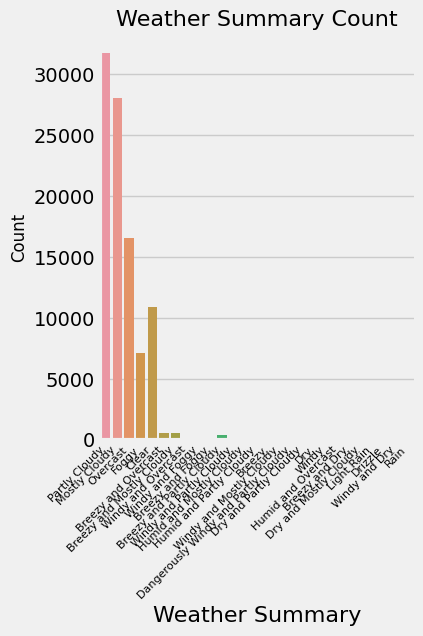

In [ ]:
plt.figure(figsize=(12,6))
sns.catplot(x='Summary', kind='count', data=weather_df)
plt.title('Weather Summary Count', fontsize=16)
plt.xlabel('Weather Summary', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)


This will give us a visual representation of the number of times each type of weather summary appears in the dataset.

From the above count plot, we can see that 'Partly Cloudy' is the most common weather summary, followed by 'Mostly Cloudy' and 'Overcast','Foggy'and 'Clear'.

# **Preprocess the Data**

preprocess it by converting the 'Precip Type' column to numerical data using Label Encoding and dropping the 'Formatted Date' column. We then split the data into training and testing sets using the train_test_split function from scikit-learn.

In [ ]:
# Preprocess the data
le = LabelEncoder()
weather_df['Precip Type'] = le.fit_transform(weather_df['Precip Type'])
weather_df = weather_df.drop(['Formatted Date'], axis=1)

# Split the data into training and testing sets
X = weather_df.drop(['Summary'], axis=1)
y = weather_df['Summary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# **Train and Evaluate**

To predict the weather condition, we can use machine learning algorithms such as Random Forest, Decision Trees, and Gradient Boosting.

Next, we train and evaluate three different classifiers: Decision Tree, Random Forest, and Gradient Boosting. We print the accuracy and confusion matrix for each model and then plot the results using a seaborn bar plot.

In [ ]:
# Train and evaluate a Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
dt_cm = confusion_matrix(y_test, dt_pred)

# Train and evaluate a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

# Train and evaluate a Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
gb_cm = confusion_matrix(y_test, gb_pred)


In [ ]:
# Print the accuracies and confusion matrices of each model
print('Decision Tree Classifier:')
print('Accuracy:', dt_acc)
print('Confusion Matrix:\n', dt_cm)
print('\nRandom Forest Classifier:')
print('Accuracy:', rf_acc)
print('Confusion Matrix:\n', rf_cm)
print('\nGradient Boosting Classifier:')
print('Accuracy:', gb_acc)
print('Confusion Matrix:\n', gb_cm)

Decision Tree Classifier:
Accuracy: 0.4087398268622674
Confusion Matrix:
 [[   3    0    1    2    2    0    0    0    0    0    0    0    0    0
     0    1    0    0    0    0    0    0    0    0]
 [   0    2    0    2    0    0    0    0    0    0    1    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   1    0   42   38   22    0    0    0    0    0    0    0    0    0
     0    2    2    2    0    0    0    0    0    0]
 [   0    0   27   61    7    0    0    0    0    0    0    0    0    0
     0    4    8    0    0    0    0    0    0    0]
 [   3    0   16   19   34    0    0    0    0    0    0    0    0    0
     0    5    0    6    0    0    0    0    0    0]
 [   0    0    0    0    1  582    1    2    0    2  100    1    0    0
     1  503  229  756    0    0    0    0    0    0]
 [   0    0    0    0    0    0    1    0    0    0    0    0    0    0
     0    3    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    1    0    0    0    0

# **Results**

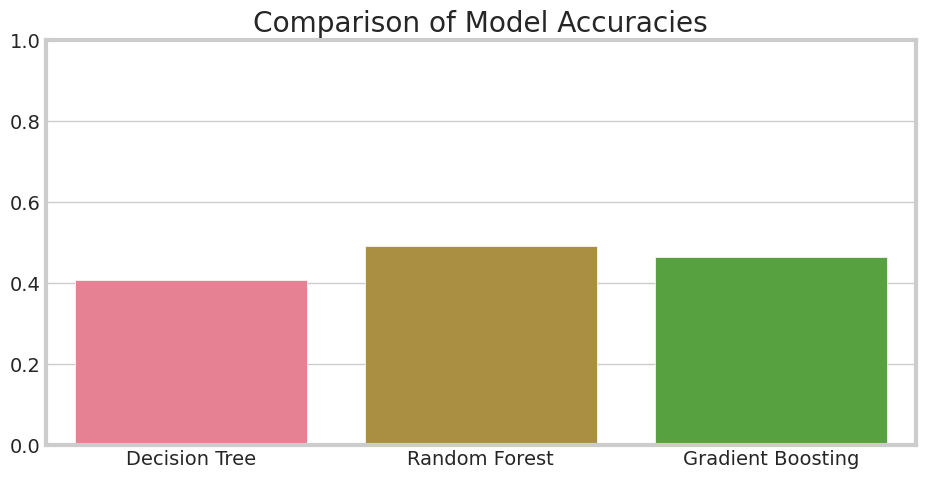

In [ ]:
# Plot the results
sns.set_style('whitegrid')
sns.set_palette('husl')
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracies = [dt_acc, rf_acc, gb_acc]
sns.barplot(x=models, y=accuracies)
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()


The resulting bar plot shows the accuracy of each model, with the Random Forest algorithm performing the best in this case. However, the results may vary depending on the dataset and the specific parameters used for each algorithm.